Lambda School Data Science

*Unit 4, Sprint 2, Module 2*

---

# Train (Prepare)
__*Neural Network Foundations*__

## Learning Objectives
* <a href="#p1">Part 1</a>: Student should be able to explain the intuition behind backpropagation and gradient descent
* <a href="#p2">Part 2</a>: Student should be able to discuss the importance of batch size
* <a href="#p3">Part 3</a>: Student should be able to discuss the importance of learning rate

## Summary of Module 1

In Module 1, we learned about Neural Networks and related concepts: Neurons, Weights, Activation Functions, and Layers (input, output, & hidden). Today, we will reinforce our understanding, and learn how a neural network is trained. **Feed-forward neural networks**, such as multi-layer perceptrons (MLPs), are almost always trained using some variation of **gradient descent** where gradients has been calculated by **back-propagation**.

  <center><img src="https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-2-Neural-Networks/main/module1-Architect/IMG_0167.jpeg" width=400></center>

- There are three kinds of layers: **input**, **hidden**, and **output**
- Each layer is made up of **n** individual neurons (aka activation units) which have a corresponding weight and bias.
- Information is passed from layer to layer through a network by:
 - Taking in inputs from the training data (or previous layer)
 - Multiplying each input by its corresponding weight (represented by arrows) and adding these products to form a weighted sum
 - Adding a bias (also represented by arrows)
 - Activating this weighted sum plus the bias term by "squishifying" it with a sigmoid or some other activation function <br>
 For a `perceptron` with three inputs and a sigmoid activation function, the output is calculated as follows: <br><br>
\begin{align}
 y = sigmoid \left(\sum(weight_{1}\times input_{1} + weight_{2} \times input_{2} + weight_{3} \times input_{3} + bias)\right)
\end{align} <br><br>
 - This "activated" neuron output $y$ is the signal that gets passed into the next layer of the network.
 

## Training a Neural Network: *Formal Summary*

0. Pick a network architecture
   - Number of input units = Number of features
   - Number of output units = Number of Classes (or categories of expected targets)
   - Select the number of hidden layers and the number of neurons within each hidden layer
1. Randomly initialize all the weights and biases
2. Forward propagate the weights and biases through the network to compute the output predictions $\hat y$
3. Given the output predictions  $\hat y$ and the true targets  $y$, compute the cost function $J(\theta)$, where $\theta$ is the set of values of all the weights and biases in the network.
4. Perform **back-propagation** to compute partial derivatives (gradients) of the cost function with respect to the weights and biases $\frac{\partial}{\partial\theta}{J(\theta)}$
5. Using the method of **gradient descent** (or other advanced optimizer), adjust the weights and biases so as to decrease the cost function $J(\theta)$.
6. Repeat steps 2 - 5 until the cost function is 'minimized' or some other stopping criteria is met. One pass over steps 2 - 5 is called an iteration or epoch.

## Check out this [Neural Networks mini-course](https://www.3blue1brown.com/topics/neural-networks),<br>
a series of five brief, excellent videos from 3Blue1Brown! 



------
# 1. Backpropagation & Gradient Descent (Learn)
<a id="p1"></a>

## Overview

Backpropagation is short for ["Backwards Propagation of errors"](https://en.wikipedia.org/wiki/Backpropagation) and refers to a specific (rather calculus intensive) algorithm for how weights in a neural network are updated in reverse order at the end of each training epoch. Our purpose today is to demonstrate the backpropagation algorithm on a simple Feedforward Neural Network and in so doing help you get a grasp on the main process. If you want to understand all of the underlying calculus of how the gradients are calculated then you'll need to dive into it yourself, watch [Backpropagation calculus ](https://www.youtube.com/watch?v=tIeHLnjs5U8) from 3Blue1Brown. Also highly recommended is this Welch Labs series [Neural Networks Demystified](https://www.youtube.com/watch?v=bxe2T-V8XRs) if you want a rapid yet orderly walk through of the main intuitions and math behind the backpropagation algorithm. 

## 1.1 What is a Gradient?

> In vector calculus, the gradient is a multi-variable generalization of the derivative. 

The gradients that we will deal with today will be vector representations of the derivative of the activation function. 

### 1.1.1 Review: Slope of a line 

![](https://www.mathwarehouse.com/algebra/linear_equation/images/slope-of-a-line/slope-formula-all_no_highlight.png)

### 1.1.2 Review: A basic derivative 

![](https://ginsyblog.files.wordpress.com/2017/02/derivativelimitdef.gif)

### 1.1.3 Gradients: Multi-dimensional derivatives

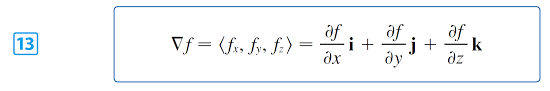



Because a derivative can have a component in multiple dimensions, we define a gradient as a multi-dimensional derivative that takes on the form of a vector. Why a vector? Because gradients have both direction and magnitude. 

**In short, gradients point in the direction of greatest change.**
![](https://i.stack.imgur.com/OI6Gy.gif)

##1.2. Gradient Descent Formula for updating neural network parameters

Given the values of the current parameters (weights and biases), this formula prescribes how to update them in order to drive down the cost function, given their current values:

$$ \huge{\theta_j = \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}}$$


In this formula, 
- $\huge{\theta_j}$ refers to the vector of weights and biases for the $jth$ data point<br><br>
- $\huge{\theta}$ refers to the combined set of weights and biases of all the data points<br><br>
- $\huge{J(\theta)}$ represents the cost function, which is a measure of the error between our predicted target values and the true target values<br><br>
- $\huge{\alpha}$ is the *learning rate*, a positive scalar hyper-parameter<br><br>
- $\huge{\frac{\partial J(\theta)}{\partial \theta_j}}$ are the partial derivatives of the cost function, which measure its sensitivity to changes in the parameters $\huge{\theta_j}$<br><br>


More sophisticated versions of gradient descent are discussed in the excellent article [**An overview of gradient descent optimization algorithms**](https://ruder.io/optimizing-gradient-descent/) by Sebastian Ruder.


These versions all build on the Gradient Descent Formula presented above, so it's best to understand this before moving on to more sophisticated versions. <br>


### 1.2.1 Geometry of Gradient Descent 

![](https://i.stack.imgur.com/yk1mk.png)

### 1.2.2 Convex vs. Non-Convex Loss Functions

Loss curves won't always have a single minimum point for gradient descent to converge towards. Sometimes there are multiple minimums. 

**Global Minimum:** The absolute minimum location of a curve (or surface). 

**Local Minimum:** The local minimum location of a curve (or surface). 


### In 3-Dimensions 
In Calculus, those ambiguous points that take on the form of both local minima and local maxima are known as [**saddle points**](https://en.wikipedia.org/wiki/Saddle_point). It's not necessary to dive into the mathematics, the key take away is that non-convex error curves (and surfaces) have this global/local minimum issue. 

![](https://www.oreilly.com/radar/wp-content/uploads/sites/3/2019/06/convex-non-convex-9c8cb9320d4b0392c5f67004e8832e85.jpg)


**Take Away:** Sometimes the gradient descent algorithm converges but is actually trapped in a local minimum. 

There are at least 2 possible solutions to this problem: 

1) Try different approaches to randomly initalizing the model weights
For this check out [Keras's docs on Weight Initializers](https://keras.io/api/layers/initializers/). Treat these weight initializers as just another hyper-parameter to include in your gridsearch. It's a good idea to get into the practice of including weight initializers in your gridsearches! 


2) Try non-gradient descent optimizers such as [Particle Swarm](https://en.wikipedia.org/wiki/Particle_swarm_optimization) or [Genetic Algorithms](https://en.wikipedia.org/wiki/Genetic_algorithm). Feel free to read up on these appraoches but know that **you are not expected to know these appraoches** and they are outside the scope of this course. 

------
## 1.3 Let's see how to implement Gradient Descent in Keras for a simple toy problem! (Follow Along)

In this section, we will again build a simple neural network using base TensorFlow. <br>
We'll train a __Feed Forward Neural Network__ to predict targets,<br> using the method of __Gradient Descent__ to adjust the neural network parameters.<br><br> This is the process of __Back-propagation__!

### 1.3.1 Generate synthetic (fake) data for a simple linear regression problem

In [ ]:
# plotting 
import matplotlib.pyplot as plt

# dataset import
from tensorflow.keras.datasets import mnist

# tensorflow imports for building 
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
%matplotlib inline

In [ ]:
# Generate samples of a Linear Regression data model
# y     =      w  *  x    +  b     + noise

### BEGIN SOLUTION
# Specify the model parameters: slope(weight) and intercept (bias)
w_true = 3.5
b_true = 50.0
# Specify how many examples we want to generate
n_examples = 1000

# linear regression assumes normally distributed data, 
#    so we'll draw our input values (x) and noise values from Gaussian distributions 
x = tf.random.normal(shape=[n_examples])
noise = tf.random.normal(shape=[n_examples])

# Generate samples from the Linear Regression data model
# y     =      w  *  x    +  b     + noise
y_true = w_true * x + b_true + noise
### END SOLUTION

### 1.3.2 Loss Function
The Mean Squared Error (MSE), is an appropriate loss function for a regression problem. We are trying to predict a continuous target.

$$\huge{\text{MSE} = \frac{1}{N}\sum_{i=1}^{N} (y_i-\hat{y}_i)^2}$$

In [ ]:
def loss(target_y, predicted_y, model, reg_strength=0.0):
    """
    Implements Mean Square Error (MSE) as the loss function
    """
    return tf.reduce_mean(tf.square(target_y - predicted_y))

### 1.3.3 Neural Network Architecture
Lets create a Neural Network class called `Model` to feed forward the input to a neural network composed of a single linear layer, with no activation function. Note: This is essentially a linear regression model whose coefficients are trained by gradient descent. In practice, gradient descent works on much more complex functions like the multi-layer networks we constructed in Module 1.

In [ ]:
class Model(object):

    def __init__(self):
        self.w = tf.Variable(8.0)
        self.b = tf.Variable(40.0)

    def __call__(self, x):
        # returns m*x + b 
        return self.w * x + self.b

# Instantiate the Model() class
model = Model()

# test the Model() class
#    with parameters w = 8 and b = 40, our model is  y(x) = w*x + b = 8
#    with input of x = 3, we expect y = 8*3 + 40 = 64

assert model(3.0).numpy() == 64.0

### 1.3.4 Prediction with Initial Weights
The initial weights in our model were initialized randomly, so of course our neural network's initial predictions are way off!

Current loss: 121.341888


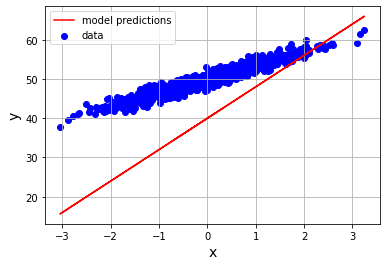

In [ ]:
inputs = x
outputs = y_true
predictions = model(inputs)
plt.scatter(inputs, outputs, c='b', label = "data")
plt.plot(inputs, predictions, c='r', label = "model predictions")
plt.xlabel('x',FontSize=14)
plt.ylabel('y',FontSize=14)
plt.legend()
plt.grid();

print('Current loss: %1.6f' % loss(predictions, outputs, model).numpy())

### 1.3.5 Training the Neural Network 
Means updating the weights and bias based on the gradients of the loss function.<br>
We'll write a helper function to train a model using Keras!


In [ ]:
 def train(model, inputs, outputs, learning_rate):
    with tf.GradientTape() as tape: 
        
      # calculate the loss function value from our model's predictions
          
      # calculate the gradient of the loss function with respect to W and wrt B 
      
      # update the value of W using the learning rate * the rate of change of the loss function wrt W 
      
      # update the value of b using the learning rate * the rate of change of the loss function wrt b        
          
          
      ### BEGIN SOLUTION
      # calculate the loss funciton value from our model's predictions
      current_loss = loss(outputs, model(inputs), model)
          
      # calculate the gradient of the loss function wrt to W and wrt B 
      dw, db = tape.gradient(current_loss, [model.w, model.b]) 
      
      # update the value of W by adding (learning rate) * (gradient of the loss function wrt W) to its current value
      model.w.assign_sub(learning_rate * dw)
      
      # update the value of b by adding (learning rate) * (gradient of the loss function wrt b) to its current value
      model.b.assign_sub(learning_rate * db)
      ### END SOLUTION

### 1.3.6 Train the Network
At each epoch, we'll print the values of the updated parameters and the loss function

In [ ]:
model = Model()

# Store parameter history
ws, bs = [], []
current_loss = []
epochs = range(50)

for epoch in epochs:


    # forward propagate the current parameters through the network to predict targets
    y_hat =  model(inputs)

    # compute the loss function by comparing target predictions to the true targets
    current_loss.append(loss(outputs, y_hat, model))

    # update the parameters based on gradient descent, and 
    train(model, inputs, outputs, learning_rate=0.1)

    # store the updated values of weight and bias
    ws.append(model.w.numpy())
    bs.append(model.b.numpy())

    print('Epoch %2d: w=%1.2f b=%1.2f loss=%2.5f' % (epoch, ws[-1], bs[-1], current_loss[-1]))



Epoch  0: w=7.09 b=41.99 loss=121.34189
Epoch  1: w=6.36 b=43.59 loss=78.06746
Epoch  2: w=5.78 b=44.87 loss=50.35867
Epoch  3: w=5.32 b=45.89 loss=32.61654
Epoch  4: w=4.95 b=46.71 loss=21.25605
Epoch  5: w=4.66 b=47.37 loss=13.98177
Epoch  6: w=4.42 b=47.90 loss=9.32392
Epoch  7: w=4.23 b=48.32 loss=6.34140
Epoch  8: w=4.08 b=48.65 loss=4.43162
Epoch  9: w=3.96 b=48.92 loss=3.20873
Epoch 10: w=3.87 b=49.14 loss=2.42567
Epoch 11: w=3.79 b=49.31 loss=1.92426
Epoch 12: w=3.73 b=49.45 loss=1.60319
Epoch 13: w=3.68 b=49.56 loss=1.39759
Epoch 14: w=3.65 b=49.65 loss=1.26594
Epoch 15: w=3.61 b=49.72 loss=1.18164
Epoch 16: w=3.59 b=49.78 loss=1.12765
Epoch 17: w=3.57 b=49.82 loss=1.09309
Epoch 18: w=3.55 b=49.86 loss=1.07095
Epoch 19: w=3.54 b=49.89 loss=1.05677
Epoch 20: w=3.53 b=49.91 loss=1.04770
Epoch 21: w=3.52 b=49.93 loss=1.04188
Epoch 22: w=3.52 b=49.95 loss=1.03816
Epoch 23: w=3.51 b=49.96 loss=1.03578
Epoch 24: w=3.51 b=49.97 loss=1.03425
Epoch 25: w=3.50 b=49.97 loss=1.03327
Epoch

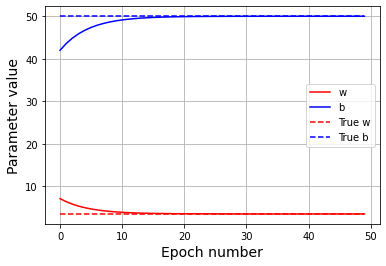

In [ ]:
plt.plot(epochs, ws, 'r', epochs, bs, 'b')
plt.plot([w_true] * len(epochs), 'r--',
         [b_true] * len(epochs), 'b--')
plt.xlabel('Epoch number',FontSize=14)
plt.ylabel('Parameter value',FontSize=14)
plt.legend(['w', 'b', 'True w', 'True b'])
plt.grid()

Current loss: 1.031534


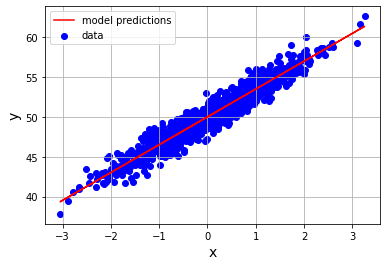

In [ ]:
plt.scatter(inputs, outputs, c='b', label = "data")
plt.plot(inputs, model(inputs),c='r',label = "model predictions")
plt.legend()
plt.xlabel('x',FontSize=14)
plt.ylabel('y',FontSize=14)
plt.grid()

print('Current loss: %1.6f'% current_loss[-1])

### Nice job! Our model closely fits the data. 
### Congratulations! <br>
You've just learned how to train a neural network using gradient descent and back-propagation with Keras!

## Challenge

In the module project, you will be asked to explain the logic of back-propagation and gradient descent.

# For parts 2 and 3, we'll return to modeling the MNIST handwritten digit data set

# 2. Effect of the Batch Size Hyperparameter on Training a Neural Network (Learn)

## 2.1 Overview

### 2.1.1 Stochastic Gradient Descent

Stochastic Gradient Descent (SGD) calculates an approximation of the gradient over the entire dataset from the predictions of a **single** randomly chosen sample. 

Why use a single sample instead of all of the samples (a batch), or a random subset of the samples (a minibatch)?

Because calculating the gradient over the entire dataset (or a subset) is extremely expensive computationally compared to using a single sample.

So SGD is super-fast. What's the tradeoff? Can't get something for nothing!<br>
The tradeoff is that SGD produces a noisy parameter update, because we are only using a small amount of information (a single sample) to compute the update!

**Takeaway**: SGD computes *rapid* but *noisy* parameter updates!

### 2.1.2 Batches and Minibatches
Batch size is the number of observations our model uses to update the weights and predict target values. A batch is a randomly selected subset of an epoch. All observations are eventually used when processing an epoch.

* Smaller Batch = Slower Run Time (but maybe more accurate results)
* Default Batch = Balance between speed and accuracy
* Large Batch = Very fast, but not nearly as accurate.

## 2.2 Baseline Model

In [ ]:
# load data

# normalize data

### BEGIN SOLUTION
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# normalize data 
max_pixel_value = 255
X_train = X_train / max_pixel_value
X_test = X_test / max_pixel_value

X_train = X_train.reshape((60000, 784))
X_test = X_test.reshape((10000, 784))
### END SOLUTION

11501568/11490434 [==============================] - 0s 0us/step


### 2.2.1 Normalizing the data helps your model learn faster

If your dataset has values ranging across multiple orders of magnitude (i.e. $10^1,~~10^2,~~10^3,~~10^4$), then gradient descent will update the weights and biases in grossly uneven proportions.<br> 

**Normalizing** the data, i.e shifting and scaling the values to lie within the unit interval $[0,1]$ ensures that all weight and bias updates are on the same scale, which can lead to quicker convergence. 

![](https://quicktomaster.com/wp-content/uploads/2020/08/contour_plot.png)

There's more to be said about Normalization and Gradient Descent <br>
If you are interested in going deeper, we highly recommend this well written article [Normalizing your data](https://www.jeremyjordan.me/batch-normalization/) in which Jeremy Jordan explores the impact of normalization on Gradient Descent in greater detail.

In [ ]:
# write a function called create_model that accepts a learning rate alpha for SGD as an input parameter 
# it should return a complied, 2 hidden layer neural net that uses SGD as the optimizer 
# Import SGD as discussed here: https://keras.io/api/optimizers/sgd/

# create create_model
def create_model(lr=.01):
    """
    Parameters
    ----------
    lr: float
        Learing rate parameter used for Stocastic Gradient Descent 
        
    Returns
    -------
    model: keras object 
        A complied keras model 
    """
### BEGIN SOLUTION
    opt = SGD(learning_rate=lr)

    model = Sequential([
          # hidden layer 1 
          Dense(1, activation='relu', input_dim=784),
          # hidden layer 2 
          Dense(32, activation='relu'),
          # output layer 
          Dense(10, activation='softmax')

    ])

    model.compile(optimizer=opt, 
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model
### END SOLUTION 

In [ ]:
create_model().summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 785       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                64        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 1,179
Trainable params: 1,179
Non-trainable params: 0
_________________________________________________________________


## 2.3 Experiments to gauge the effect of batch size (Follow Along)
Let's run a series of experiments for a default, small, and large batch size.

### 2.3.1 Default Batch Size
Batch Size is 32

In [ ]:
# instantiate a model and fit it with batch size of 32
model = create_model()
bt_default = model.fit(X_train, y_train, batch_size=32, validation_data=(X_test, y_test), epochs=5)

### 2.3.2 Small Batch Size
Batch Size is 8

In [ ]:
# instantiate a model and fit it with batch size of 8


### 2.3.3 Large Batch Size
Batch Size is 512

In [ ]:
# instantiate a model and fit it with batch size of 512


### 2.3.4 Visualize Results

In [ ]:
import seaborn as sns
import pandas as pd

batch_sizes = []

for exp, result in zip([bt_default, bt_small, bt_large], ["32_", "8_", "512_"]):

    df = pd.DataFrame.from_dict(exp.history)
    df['epoch'] = df.index.values
    df['Batch Size'] = result

    batch_sizes.append(df)

df = pd.concat(batch_sizes)
df['Batch Size'] = df['Batch Size'].astype('str')
df.head()

In [ ]:
sns.lineplot(x='epoch', y='val_accuracy', hue='Batch Size', data=df);

In [ ]:
sns.lineplot(x='epoch', y='val_loss', hue='Batch Size', data=df);

## Challenge

You will be expected to experiment with batch size on today's assignment.

# 3. The Effect of the Learning Rate Hyperparameter on Neural Network Training (Learn)

![](https://www.jeremyjordan.me/content/images/2018/02/Screen-Shot-2018-02-24-at-11.47.09-AM.png)

## 3.1 Overview

Learning Rate controls the size of the update to our weights that the optimization algorithm makes. VERY IMPORTANT hyperparameter.

* If the learning rate is too high, the model will not find the minimum
* If the learning rate is too low, the model will underfit or take too long to converge
* Goldilocks learning rate is "just right", the model converges rapidly
* Scale of 0-1

## 3.2 Experiments to gauge the gffect of learning rate (Follow Along)

Same experiment with Batch but different learning rates:
* High Learning = .75
* Default Learning = .01
* Low Learning Rate = .0001

### 3.2.1 Default Learning Rate

In [ ]:
# instantiate a model and fit it with a learning rate value of 0.01
model = create_model(lr=.01)
lr_default = model.fit(X_train, y_train, batch_size=32, validation_data=(X_test, y_test), epochs=5)

### 3.2.2 High Learning Rate

In [ ]:
# instantiate a model and fit it with a learning rate value of 0.75
lr_high = 

### 3.2.3 Low Learning Rate

In [ ]:
# instantiate a model and fit it with a learning rate value of 0.0001
lr_low = 

### 3.2.4 Visualize Results

In [ ]:
import seaborn as sns
import pandas as pd

batch_sizes = []

for exp, result in zip([lr_default, lr_low, lr_high], [".01_", ".0001_", ".75_"]):

    df = pd.DataFrame.from_dict(exp.history)
    df['epoch'] = df.index.values
    df['Learning Rate'] = result

    batch_sizes.append(df)

df = pd.concat(batch_sizes)
df['Learning Rate'] = df['Learning Rate'].astype('str')
df.head()

In [ ]:
sns.lineplot(x='epoch', y='val_loss', hue='Learning Rate', data=df);

In [ ]:
sns.lineplot(x='epoch', y='val_accuracy', hue='Learning Rate', data=df);

## Challenge

You will be expected to experiment with different learning rates today.

---

# 4. Stretch: How do I know if my neural net is overfitting ?

Compare train losses vs. test losses (or use a metric such as accuracy instead of loss) and look for the gap between the curves. 


See [**this resource**](https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/) for further details 

In [ ]:
sns.lineplot(x='epoch', y='val_loss', data=df[df['Learning Rate']=='.01_'], label="test_loss")
sns.lineplot(x='epoch', y='loss', data=df[df['Learning Rate']=='.01_'], label="train_loss");

In [ ]:
sns.lineplot(x='epoch', y='val_accuracy', data=df[df['Learning Rate']=='.01_'])
sns.lineplot(x='epoch', y='accuracy', data=df[df['Learning Rate']=='.01_']);